In [23]:
import tensorflow as tf
import numpy as np
import gym

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
sess = tf.InteractiveSession()

Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f66fc3fe190>> ignored


In [26]:
e = gym.make('Breakout-v0')
ob = e.reset()

[2016-05-19 17:09:21,721] Making new env: Breakout-v0


(210, 160, 3) uint8


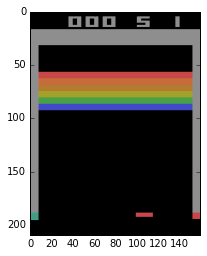

In [27]:
print ob.shape, ob.dtype
plt.imshow(ob)

## Converting to Grayscale

In [34]:
# reshape is needed so we can use plt.imshow
rgb_to_gray = tf.reshape(tf.image.rgb_to_grayscale(ob), [ob.shape[0], ob.shape[1]])

In [35]:
gray_ob = rgb_to_gray.eval()
gray_ob.shape, gray_ob.dtype

((210, 160), dtype('uint8'))

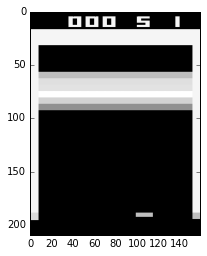

In [36]:
plt.gray()
plt.imshow(gray_ob)

## Resizing Images

In [39]:
# let's get the current ratio
from __future__ import division
ratio = ob.shape[0] / ob.shape[1]
print ratio

1.3125


In [87]:
def resize_op(img, h, w):
    resized_ob = tf.image.resize_bilinear(tf.reshape(ob, [1, ob.shape[0], ob.shape[1], ob.shape[2]]), [h,w ])
    return tf.reshape(resized_ob, [h, w, 3])

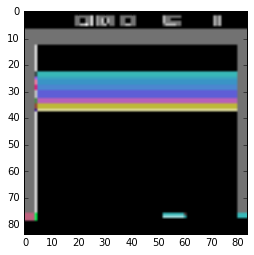

In [88]:
# 84 x 84 is the size of the img used in the original DQN paper, 21168 or 7056 (grayscale) points per img
plt.imshow(resize_op(ob, 84, 84).eval())

height = 52 width = 40
pixels with rgb = 6240 grayscale = 2080


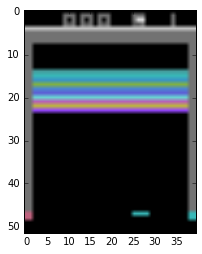

In [111]:
w = 40
h = int(w * ratio)
rgb_pixels = 3 * h * w
grayscale_pixels = h * w
print 'height =', h, 'width =', w
print 'pixels with rgb =', rgb_pixels, 'grayscale =', grayscale_pixels
plt.imshow(resize_op(ob, h, w).eval())

## Scaling Pixel Values

In [92]:
scaled_ob = tf.image.convert_image_dtype(ob, tf.float32, saturate=True).eval()
print scaled_ob.min(), scaled_ob.max()

0.0 0.784314


In [75]:
np.unique(ob)

array([  0,  42,  48,  58,  66,  72, 108, 122, 130, 142, 158, 160, 162,
       180, 198, 200], dtype=uint8)

In [77]:
np.unique(gray_ob)

array([  0,  84, 110, 123, 127, 129, 131, 142, 148], dtype=uint8)

In [94]:
np.unique(scaled_ob)

array([ 0.        ,  0.16470589,  0.18823531,  0.227451  ,  0.25882354,
        0.28235295,  0.42352945,  0.4784314 ,  0.50980395,  0.55686277,
        0.61960787,  0.627451  ,  0.63529414,  0.70588237,  0.77647066,
        0.7843138 ], dtype=float32)

## Putting it Together - Making a Image Preprocessing Pipeline

In [97]:
# assumes img.shape is (batch_size, h, w, c)
def img_preprocess(img, h, w):
    img = tf.convert_to_tensor(img)
    rgb2y = tf.image.rgb_to_grayscale(img)
    resized = tf.image.resize_bilinear(rgb2y, [h, w])
    return resized

In [105]:
obs = np.reshape(ob, [1] + list(ob.shape))
obs.shape

(1, 210, 160, 3)

In [112]:
preprocessed_img = img_preprocess(obs, 84, 84).eval()

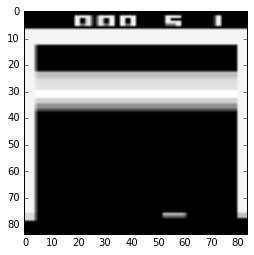

In [113]:
plt.gray()
plt.imshow(preprocessed_img.reshape(84, 84))

We didn't do scaling in the pipeline here if we did we wouldn't be able to show the image. But if we're feeding the input into a neural network we might scale it.